<a href="https://colab.research.google.com/github/worklifesg/Deep-Learning-Projects/blob/master/Coursera%20Guided%20Projects/Text%20Classification%20Using%20Word2Vec%20and%20LSTM%20on%20Keras/Text_Classification_Using_Word2Vec_and_LSTMs_on_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment classification** is the automated process of identifying opinions in text and labeling them as positive, negative, or neutral, based on the emotions customers express within them.
![movie_reviews.jpg](attachment:movie_reviews.jpg)

**Transfer learning** is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task!

**Word Embeddings** Definition Word embeddings are a type of word representation that look at the context of words which allows words with similar meaning to have a similar vector representation.


1. Each word is represented as  a vector.

2. Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network.

3. They can be considered an improvement over sparse representations used in simpler bag of word model representations.

**Word2Vec**

Word2Vec is a shallow, two-layer neural networks which is trained to reconstruct linguistic contexts of words.
Input: Large Corpus of words


Output: Vector Space, with each unique word in the corpus being assigned a corresponding vector in the space.


Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.


**Deep Network** Deep network takes the sequence of embedding vectors as input and converts them to a compressed representation. The compressed representation effectively captures all the information in the sequence of words in the text. The deep neywrok part is usually an RNN or some forms of it like LSTM/GRU. The dropout is added to overcome the tendency to overfit, a very common problem with RNN based networks.

**Recurrent Neural Networks** Recurrent Neural Networks are used to handle sequential data. One of the appeals of RNNs is the idea that they might be able to connect previous information to the present task, such as using previous video frames/words might inform the understanding of the present frame/words. 


Sometimes, we only need to look at recent information to perform the present task. But Unfortunately, as that gap grows, RNNs become unable to learn to connect the information.

Standard RNNs fail to learn in the presence of time lags greater than 5 – 10 discrete time steps between relevant input events and target signals. The vanishing error problem casts doubt on whether standard RNNs can indeed exhibit significant practical advantages over time window-based feedforward networks. A recent model, “Long Short-Term Memory” (LSTM), is not affected by this problem. LSTM can learn to bridge minimal time lags in excess of 1000 discrete time steps by enforcing constant error flow through “constant error carrousels” (CECs) within special units, called cells

**LSTM** Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

![lstm_cropped.png](attachment:lstm_cropped.png)

1. Pre-processing Data for Word2Vec Model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import nltk
import string
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading Data 

In [2]:
df = pd.read_csv('IMDB_movie_reviews.csv',encoding='utf-8')
df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1



# Data Preprocessing

1. **Tokenization** is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords.

2. Removing **Punctuations**

3. Removing tokens which are not alphabetic

4. **Stopwords Removal**: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 




In [3]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

review_lines = list()

lines = df['review'].values.tolist() #convert lines to a list

for line in lines: #this loop will tokenize, strip the punctuation, remove token that are not alphabetic, remove stop words also
  tokens = word_tokenize(line)
  tokens = [word.lower() for word in tokens] #lower case for each word

  table = str.maketrans('','',string.punctuation) #punctuations in a string
  stripped = [w.translate(table) for w in tokens] #strip the punctuation

  words = [word for word in stripped if word.isalpha()] #removing tokens that are not alphabets
  
  
  stop_words = set(stopwords.words('english')) #all repeated stop words in english corpus
  words = [w for w in words if not w in stop_words]

  review_lines.append(words)

**Word2Vec** is a simple Neural Network with one hidden layer & has weights and during training, its goal is to adjust those weights to reduce the loss function.

During the training, weights are adjusted through back-propagation. Once the training is completed, instead of taking the entire model, we just take the **hidden weights** which are our word embeddings.

Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.

Gensim is an Open Source Python Library which can be used to implement Word2Vec.

In [4]:
import gensim

embedding_dim = 100 #specify dimensions of embeddings

model = gensim.models.Word2Vec(sentences=review_lines,\
                               size=embedding_dim, window=5,\
                               min_count=1) #list of sentances (tokens)
words = list(model.wv.vocab) #vocab size

print('Vocabulary size: %d' % len(words))

Vocabulary size: 134156


**Saving** the word2vec model in ASCII (word2vec) format

Lets test our Word2Vec Model to see how it performs using utility functions provided in Gensim

In [5]:
model.wv.most_similar('director')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('filmmaker', 0.7549102902412415),
 ('screenwriter', 0.6730122566223145),
 ('altman', 0.6559675335884094),
 ('directors', 0.649754524230957),
 ('writerdirector', 0.6488274335861206),
 ('filmmakers', 0.6135684847831726),
 ('writer', 0.6127024292945862),
 ('vipul', 0.6088660359382629),
 ('harlin', 0.6086643934249878),
 ('lumet', 0.6014989614486694)]

Let’s see the result of semantically reasonable word vectors (actress - actor + heroine)


In [6]:
model.wv.most_similar(positive=['actress','heroine'],\
                      negative=['actor'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('protagonist', 0.7381014823913574),
 ('damsel', 0.7154332399368286),
 ('sexually', 0.7131143808364868),
 ('seductive', 0.7071361541748047),
 ('vulnerable', 0.7019208669662476),
 ('stepmother', 0.7014776468276978),
 ('jealousy', 0.6959023475646973),
 ('nurse', 0.6927211880683899),
 ('housewife', 0.6799091100692749),
 ('lesbian', 0.6791645288467407)]

**Odd One out** - Finding the odd word out of the given list of words

In [7]:
print(model.wv.doesnt_match('film movie theatre tea'.split()))

tea


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## Save model in ASCII (word2vec) format

In [8]:
filename = 'imdb_embedding_word2vec_result.txt'

model.wv.save_word2vec_format(filename,binary=False)

## Load the embeddings from the file into a dictionary

In [9]:
import os
embedding_index = {} #embeddings in a dict

f = open('imdb_embedding_word2vec_result.txt',encoding='utf-8')

for line in f:
  values = line.split() #split each line
  word = values[0] #first vector is always word
  coefs = np.asarray(values[1:])

  embedding_index[word]=coefs
f.close()  

**Tokenization** is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. 

**Padding** All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our model e.g. LSTM, not all the sentences have the same length. In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the padding is necessary.

**Splitting the data** 

In [10]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
import numpy as np

validation_split = 0.2

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(review_lines)

sequences = tokenizer_obj.texts_to_sequences(review_lines)

# to keep text constant, we will pad them with extra zeros (we will keep max 100)

max_length = 100

word_index = tokenizer_obj.word_index

review_pad = pad_sequences(sequences,maxlen=max_length)
sentiment = df['sentiment'].values

print(review_pad.shape)
print(sentiment.shape)

indices = np.arange(review_pad.shape[0]) #shuffle data before spliting
np.random.shuffle(indices)

review_pad = review_pad[indices]
sentiment = sentiment[indices]

num_validation_samples = int(validation_split*review_pad.shape[0])

x_val_pad = review_pad[:num_validation_samples]
y_val_pad = sentiment[:num_validation_samples]

X_train_pad = review_pad[num_validation_samples:]
y_train = sentiment[num_validation_samples:]

(50000, 100)
(50000,)


## Splitting Train data further into Train & Test Sets

In [11]:
test_split = 0.1

num_test_samples = int(test_split*X_train_pad.shape[0])
X_test_pad = X_train_pad[:num_test_samples]
y_test = y_train[:num_test_samples]

X_train_pad = X_train_pad[num_test_samples:]
y_train = y_train[num_test_samples:]

In [12]:
print(X_train_pad.shape)
print(y_train.shape)

print(x_val_pad.shape)
print(y_val_pad.shape)

print(X_test_pad.shape)
print(y_test.shape)

(36000, 100)
(36000,)
(10000, 100)
(10000,)
(4000, 100)
(4000,)


## Creating an Embedding Matrix

In [13]:
#transforming embeddings (dictioanry) into matrix as Keras accept it.

embedding_dim = 100

num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,embedding_dim))

for word, i in word_index.items(): #for each word and its values
  if i > num_words:
    continue
  embedding_vector = embedding_index.get(word)

  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

## Training 

Defining the Model

In Keras, A **Sequential model** is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
1. Load pre-trained word embeddings into an Embedding layer

2. Adding LSTM Layer

3. Adding Dense Layer

**model.compile** used to Configures the model for training.


**model.add()** function is used to add layers to our model.

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

model = Sequential()

embedding_layer = Embedding(num_words,
                            embedding_dim,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model.add(embedding_layer)
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2 )) #dropout to deactivate some of the neurons to make sure that it doesn't overfit model at every epoch 
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print('Summary of the built model..')

print(model.summary())

Summary of the built model..
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          13415700  
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 13,432,757
Trainable params: 17,057
Non-trainable params: 13,415,700
_________________________________________________________________
None


## Training the Model

Use the .fit method.

Assign the model.fit() method to a variable, which will store the Training, Validation Loss and Accuracy for each epoch. 

In [15]:
history = model.fit(X_train_pad,y_train,batch_size=128,epochs=10, \
                    validation_data=(x_val_pad,y_val_pad),verbose=2)

Epoch 1/10
282/282 - 88s - loss: 0.4790 - accuracy: 0.7641 - val_loss: 0.3940 - val_accuracy: 0.8310
Epoch 2/10
282/282 - 89s - loss: 0.3737 - accuracy: 0.8363 - val_loss: 0.3449 - val_accuracy: 0.8476
Epoch 3/10
282/282 - 88s - loss: 0.3470 - accuracy: 0.8492 - val_loss: 0.3300 - val_accuracy: 0.8595
Epoch 4/10
282/282 - 90s - loss: 0.3280 - accuracy: 0.8565 - val_loss: 0.3172 - val_accuracy: 0.8644
Epoch 5/10
282/282 - 89s - loss: 0.3189 - accuracy: 0.8621 - val_loss: 0.3217 - val_accuracy: 0.8624
Epoch 6/10
282/282 - 89s - loss: 0.3081 - accuracy: 0.8663 - val_loss: 0.3066 - val_accuracy: 0.8706
Epoch 7/10
282/282 - 88s - loss: 0.3011 - accuracy: 0.8693 - val_loss: 0.3007 - val_accuracy: 0.8734
Epoch 8/10
282/282 - 88s - loss: 0.2949 - accuracy: 0.8731 - val_loss: 0.3026 - val_accuracy: 0.8736
Epoch 9/10
282/282 - 89s - loss: 0.2881 - accuracy: 0.8765 - val_loss: 0.2953 - val_accuracy: 0.8775
Epoch 10/10
282/282 - 89s - loss: 0.2825 - accuracy: 0.8806 - val_loss: 0.3007 - val_accura

## Evaluating the Model on Test Set

**Score** is the evaluation of the loss function for a given input.

**Accuracy** How accurate your model's prediction is compared to the true data.


In [16]:
score, acc = model.evaluate(X_test_pad,y_test,batch_size=128)

print('Test Score: ', score)
print('Test accuracy: ',acc)

32/32 [==============================] - 1s 29ms/step - loss: 0.3100 - accuracy: 0.8692
Test Score:  0.31002792716026306
Test accuracy:  0.8692499995231628


## Plotting the Accuracy and Loss 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


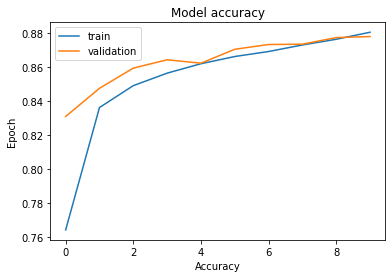

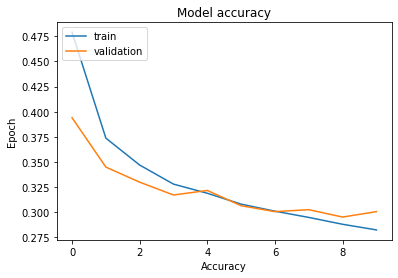

In [17]:
print(history.history.keys()) #stores history of model , it has dict keys

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')

plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')

plt.legend(['train','validation'],loc='upper left')
plt.show()

## Testing the Model on Sample data


In [18]:
test_sample_1 = 'The movie was fantastic! I like it !'
test_sample_2 = 'Not a great movie, it was really bad..'
test_samples = [test_sample_1,test_sample_2]

test_samples_tokens = tokenizer_obj.texts_to_sequences(test_samples)
test_samples_tokens_pad = pad_sequences(test_samples_tokens,maxlen=100)

model.predict(x=test_samples_tokens_pad)

array([[0.91536766],
       [0.3439894 ]], dtype=float32)